In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import time
from pathlib import Path

import cv2 as cv
import numpy as np
import json

import matplotlib.pyplot as plt

from collections import OrderedDict

from datagen.imgen.ops import boxes_ops
from datagen.imgen import transforms
from datagen.imgen.content import utils as content_utils
from datagen.config import data_config
from datagen.imgen.io import fop

from tqdm import tqdm

from datagen.imgen.idcard import combiner 

In [3]:
from pathlib import Path

import cv2 as cv
import imutils

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datagen.imgen.transforms import functional as F
from datagen.imgen.transforms import effects as E
from datagen.imgen import transforms as T

matplotlib.rcParams['figure.figsize'] = (12,12)

In [4]:
#declare parameter
bg_path = '/data/idcard/source/background/clean/'
idcard_path = '/data/idcard/results/base/base1k/'
dst_path = '/data/idcard/'
idcard_ext="png" 
bg_ext="jpg|png"
bg_size=None
angle: int = 30
shear: float = 0.5
scale_ratio: str = "0.5,0.9"
num_generated: int = 6

In [5]:
bg_data, bg_path = combiner.clean_background_data(bg_path, bg_ext)
idcard_image_data, idcard_json_data = combiner.clean_idcard_data(idcard_path, image_ext=idcard_ext)
bg_size = combiner.clean_background_size(bg_size)
dst_path, base_path = combiner.clean_destination_path(dst_path)

augment_param = combiner.clean_augment_param(angle, shear, scale_ratio, num_generated)
angle, shear, scale_ratio, num_generated  = augment_param

bg_data = combiner.bg_data_balancer(bg_data, idcard_image_data)

Logs: Loading 1988 data from /data/idcard/source/background/clean as background
Logs: Loading 1000 data from /data/idcard/results/base/base1k as IDCard
Logs: Preparing destination directory at /data/idcard
Logs: Creating directory recursively
Info: angle=30 shear_factor=0.5 scale_ratio=[0.5, 0.6, 0.7, 0.7999999999999999]


In [6]:
%%time
idx = random.randint(0, len(bg_data))
bgfile, idfile, jsfile = bg_data[idx], idcard_image_data[idx], idcard_json_data[idx]

bg_img = cv.imread(str(bgfile), cv.IMREAD_UNCHANGED)
id_img = cv.imread(str(idfile), cv.IMREAD_UNCHANGED)

CPU times: user 148 ms, sys: 26.1 ms, total: 174 ms
Wall time: 174 ms


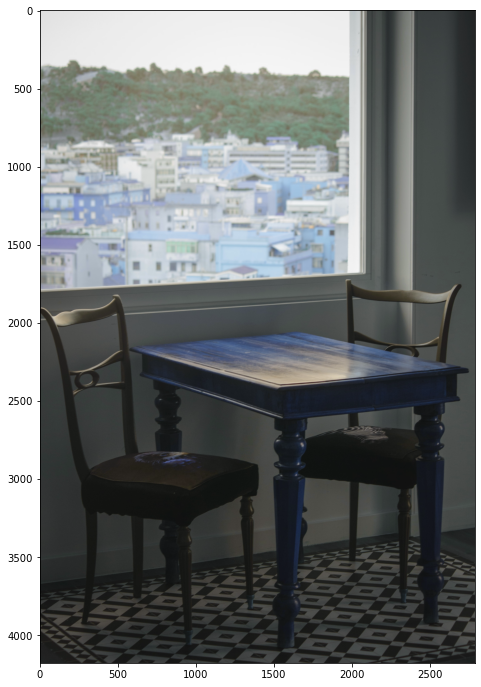

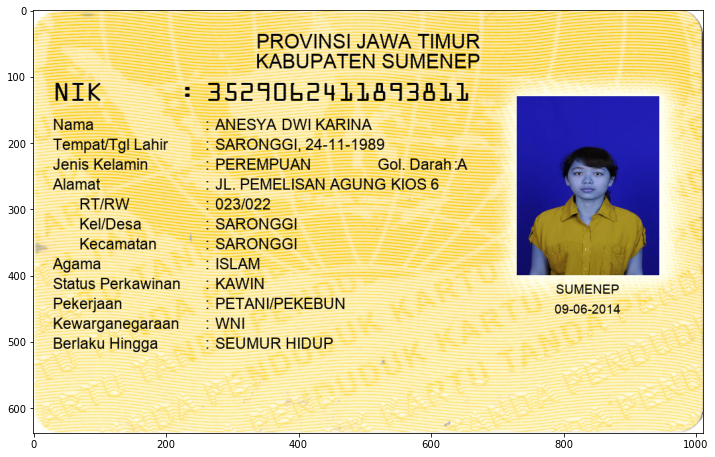

In [7]:
plt.figure(figsize=(12,12));plt.imshow(bg_img);plt.show()
plt.figure(figsize=(12,12));plt.imshow(id_img);plt.show()

In [8]:
# from datagen.imgen.ops import image_ops

# idcard_path ='/workspace/serverfs/data/idcard/base/3101020907676543_40299.png'
# idcard_image = cv.imread(idcard_path, cv.IMREAD_UNCHANGED)
# # print(idcard_image[-1])
# idcard_image_segment = image_ops.image_selection(idcard_image, val=0)
# # sH, sW = seg_size = idcard_image_segment.shape[:2]
# # bH,eH = int(sH*0.02), sH-int(sH*0.02), 
# # bW,eW = int(sW*0.015), sW-int(sW*0.015)
# # idcard_image_segment[bH:eH,bW:eW] = idcard_image_segment.max()

# # segment_canvas = image_ops.create_canvas(back_size)
# # segment_image = image_ops.join2image_withcoords(idcard_image_segment, segment_canvas, xybox)
# alpha_img = cv.split(idcard_image)[-1].astype(np.uint8)
# print(alpha_img[100:200, 100:200])
# plt.imshow(alpha_img, cmap='gray')

In [9]:
# plt.imshow(bg_img)

import cv2 as cv

len(cv.cvtColor(bg_img, cv.COLOR_BGR2GRAY).shape)


2

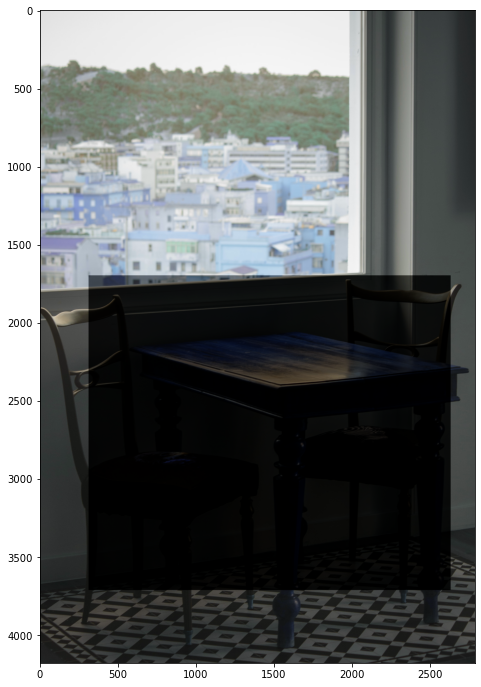

In [21]:
rs = T.RandomShadow(p=1)
plt.imshow(rs(bg_img))

In [87]:
from datagen.imgen.transforms import functional as F
from datagen.imgen.transforms import effects as E
from datagen.imgen import transforms as T

basic_effect = T.ComposeRandomChoice([
#     T.RandomGamma(gamma_range=(0.5, 2.5), p=1),
#     T.RandomContrast(level_range=(0, 20), p=1),
#     T.RandomBrightness(level_range=(20, 50), p=1),
#     T.Darken(),
#     T.Lighten(),
#     T.RandomLoRes(factor_range=(0.3,0.5)),
    T.RandomSharpen(p=1),
#     T.RandomNoise(amount_range=(0.05, 0.20)),
#     T.RandomHueShifting(shift_range=(1, 100), p=1),
#     T.RandomChannelShuffle(p=1),
#     T.RandomGaussionBlur(sigma_range=(1.0, 5.0), p=1),
#     T.RandomMedianBlur(p=1),
], k=1, debug=True)

other_effect = T.ComposeRandomChoice([
        T.RandomMorphDilation(p=0.5),
        T.RandomMorphOpening(p=0.5),
        T.RandomMorphClosing(p=0.5)
], k=1, debug=True)

image_effect = basic_effect(id_img)
# image_effect = other_effect(image_effect)
# (image_effect * 255).astype(np.uint8).max()
print(image_effect.max(), image_effect.dtype, image_effect.shape)
plt.imshow(image_effect, cmap='gray')

TypeError: super(type, obj): obj must be an instance or subtype of type

1. Create Hand Effect (hard complexity)
2. Fix or Create new Shadow Effect (medium complexity)
3. Old Document Effect (medium complexity)
4. Broken Document Effect (Noise Effect) (50% fix)
5. Randomize text position (medium complexity)
6. Randomize Picture Position (medium complexity)
7. Add more face for ktp (fix) (easy)

In [34]:
advance_effect = T.ComposeRandomChoice([
    T.RandomAddSunFlares(p=1),
    T.RandomAddShadow(p=1),
    T.RandomAddSnow(p=1),
#     T.RandomAddRain(p=1),
    T.RandomAddSpeed(p=1),
    T.RandomAddFog(p=1),
    T.RandomAddGravel(p=1),
], k=1)

image_adv_effect = advance_effect(base_image)
plt.imshow(image_adv_effect, cmap='gray')

NameError: name 'base_image' is not defined

In [11]:
darken = T.Darken()
img_darken = darken(back_image)
plt.imshow(img_darken, cmap='gray')

NameError: name 'back_image' is not defined

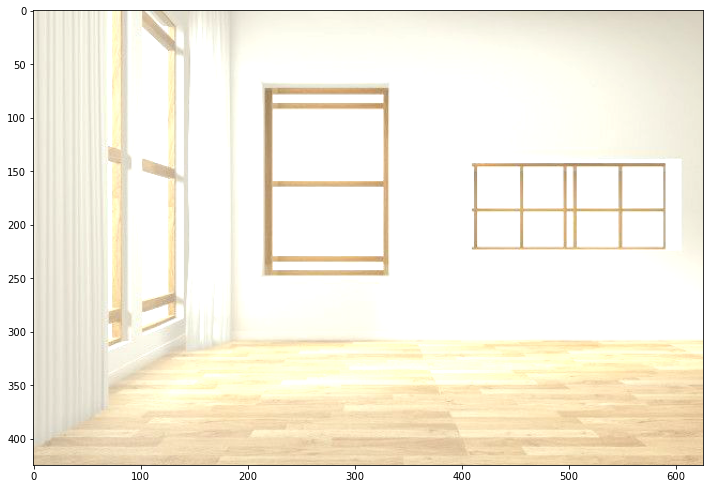

In [39]:
lighten = T.Lighten()
img_lighten = lighten(back_image)
plt.imshow(img_lighten, cmap='gray')

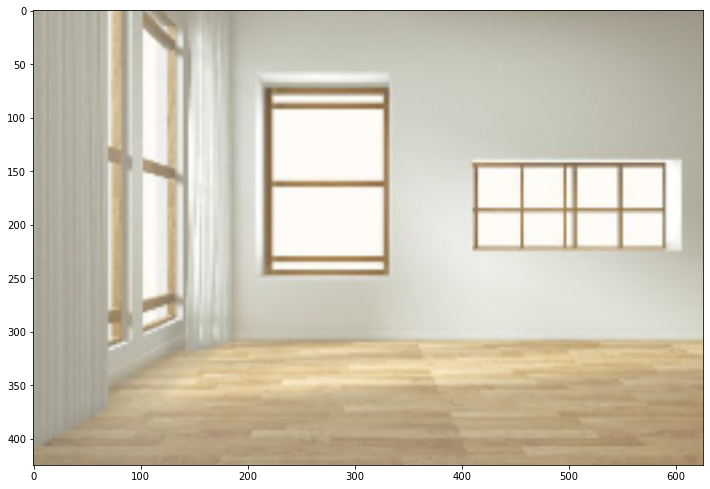

In [43]:
lo_res = T.ToLoRes(factor=0.4)
img_lo_res = lo_res(back_image)
plt.imshow(img_lo_res, cmap='gray')

0.4843362943903874

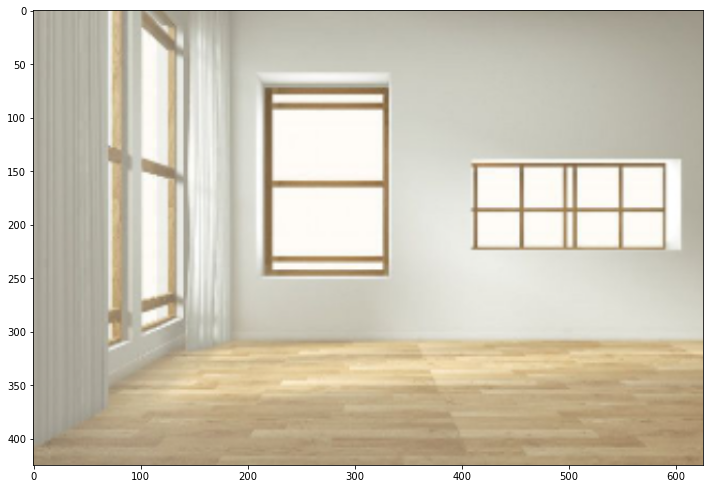

In [67]:
rand_lo_res = T.RandomLoRes()
img_lo_res = rand_lo_res(back_image)
plt.imshow(img_lo_res, cmap='gray')
rand_lo_res.factor

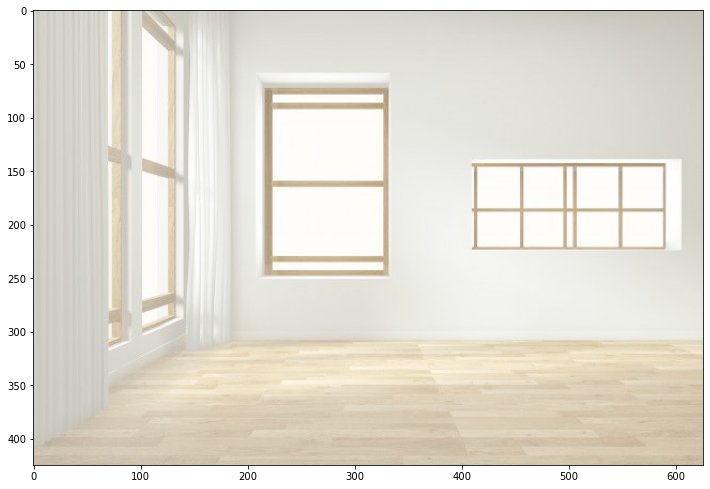

In [64]:
random_gamma = T.RandomGamma(gamma_range=(0.5, 2.5), p=1)
img_gamma = random_gamma(back_image)
plt.imshow(img_gamma, cmap='gray')

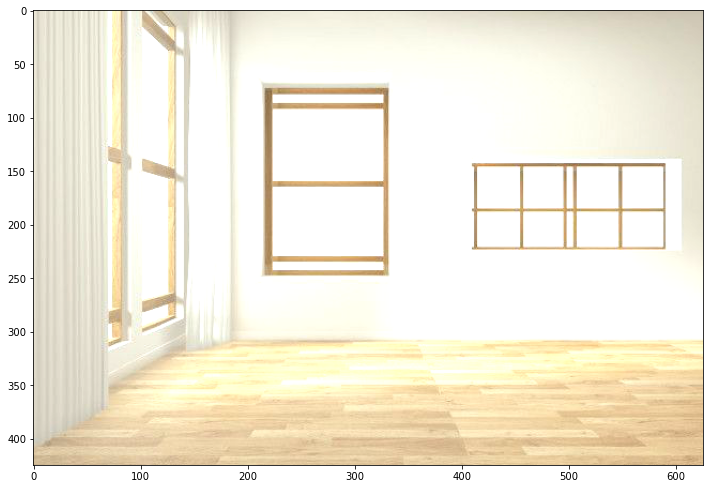

In [15]:
random_contrast = T.RandomContrast(level_range=(0, 20), p=1)
img_contrast = random_contrast(back_image)
plt.imshow(img_contrast, cmap='gray')

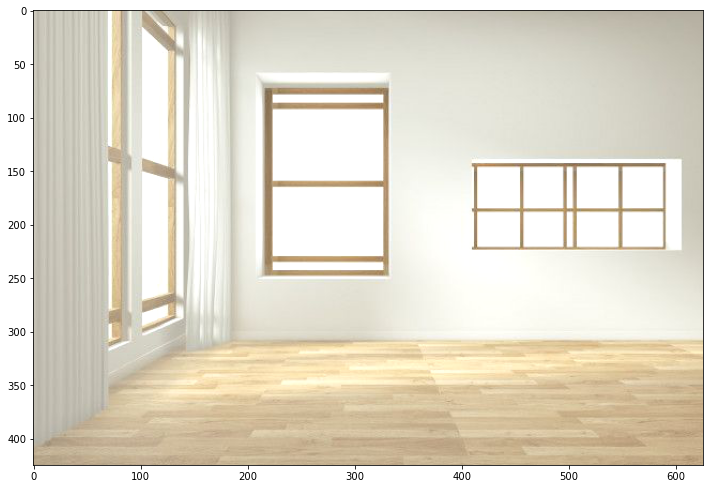

In [16]:
random_brightness = T.RandomBrightness(level_range=(20, 50), p=1)
img_brightness = random_brightness(back_image)
plt.imshow(img_brightness, cmap='gray')

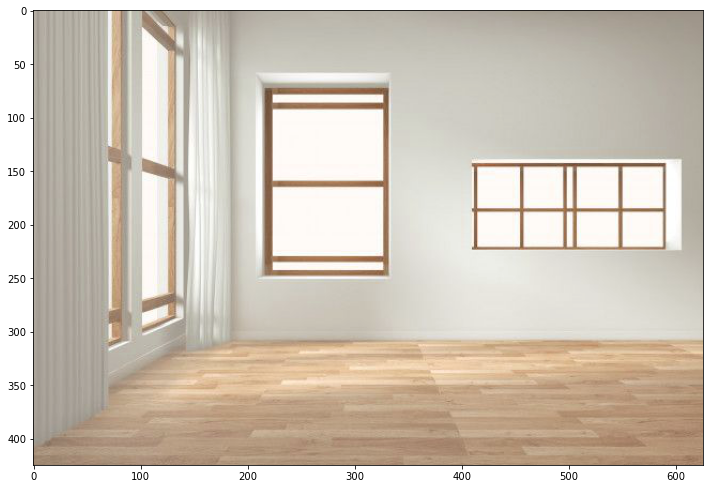

In [69]:
random_hue = T.RandomHueShifting(shift_range=(1, 100), p=1)
img_hue = random_hue(back_image)
plt.imshow(img_hue, cmap='gray')

In [72]:
random_chanshuffle = T.RandomChannelShuffle(p=1)
img_chanshuffle = random_chanshuffle(back_image)
plt.imshow(img_chanshuffle, cmap='gray')

TypeError: object of type 'int' has no len()

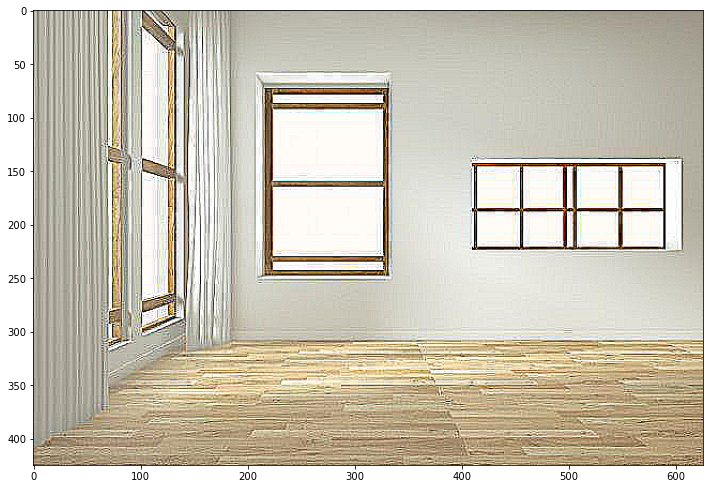

In [77]:
random_sharpen = T.RandomSharpen(p=1)
img_sharpen = random_sharpen(back_image)
plt.imshow(img_sharpen, cmap='gray')

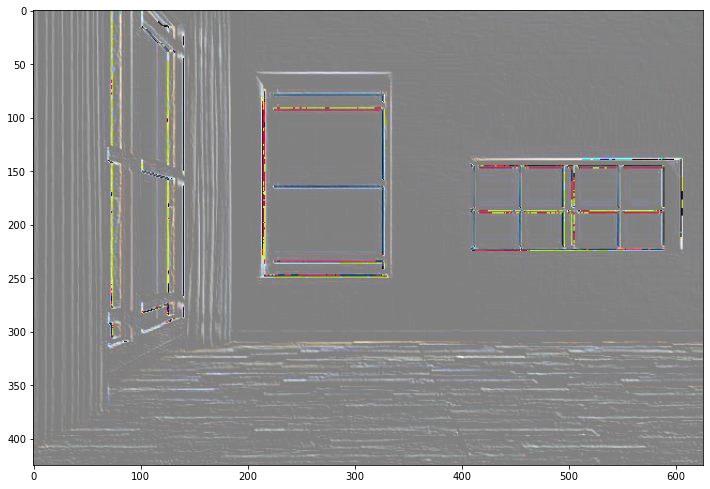

In [78]:
random_emboss = T.RandomEmboss(p=1)
img_emboss = random_emboss(back_image)
plt.imshow(img_emboss, cmap='gray')

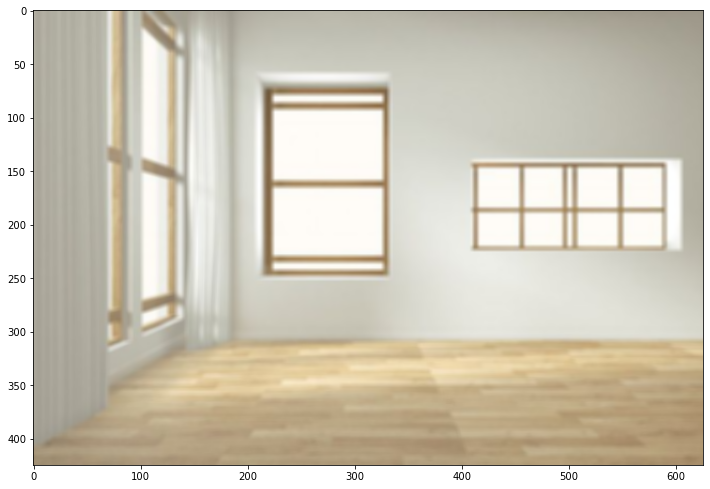

In [79]:
random_gaussian = T.RandomGaussionBlur(sigma_range=(1.0, 5.0), p=1)
img_gaussian = random_gaussian(back_image)
plt.imshow(img_gaussian, cmap='gray')

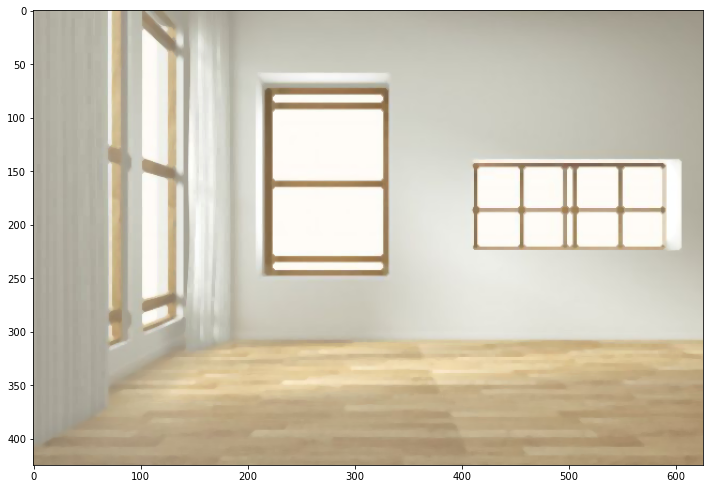

In [80]:
random_median = T.RandomMedianBlur(p=1)
img_median = random_median(back_image)
plt.imshow(img_median, cmap='gray')

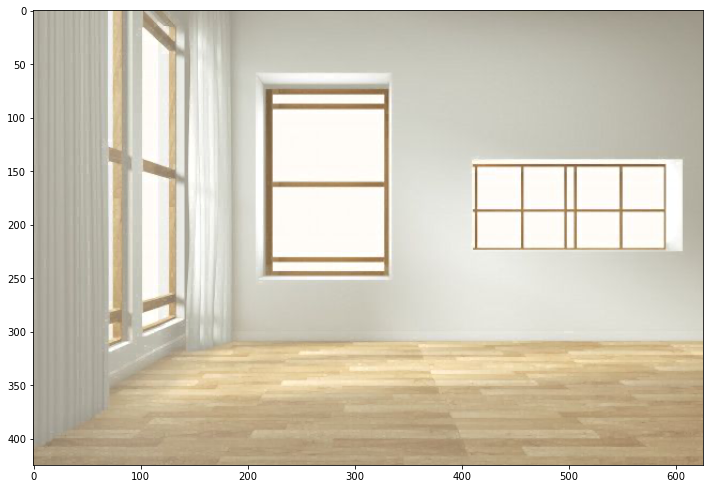

In [81]:
random_dilation = T.RandomMorphDilation(p=1)
img_dilation = random_dilation(back_image)
plt.imshow(img_dilation, cmap='gray')

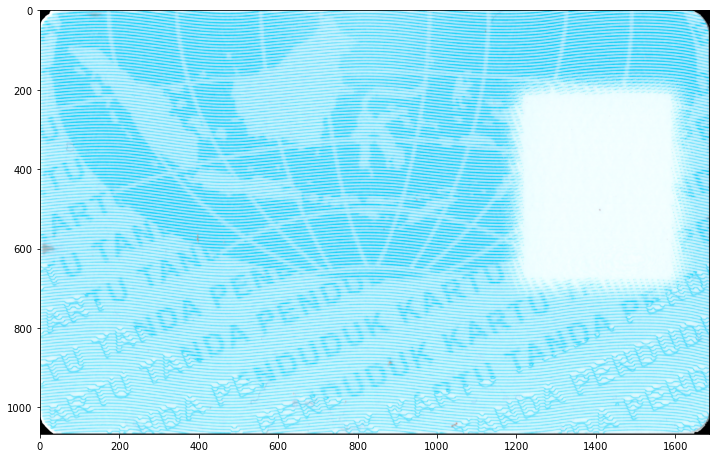

In [82]:
random_opening = T.RandomMorphOpening(p=1)
img_opening = random_opening(base_image)
plt.imshow(img_opening, cmap='gray')

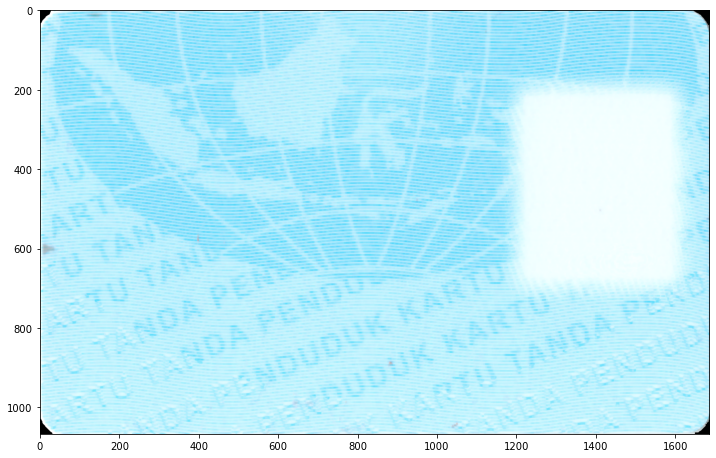

In [83]:
random_closing = T.RandomMorphClosing(p=1)
img_closing = random_closing(base_image)
plt.imshow(img_closing, cmap='gray')

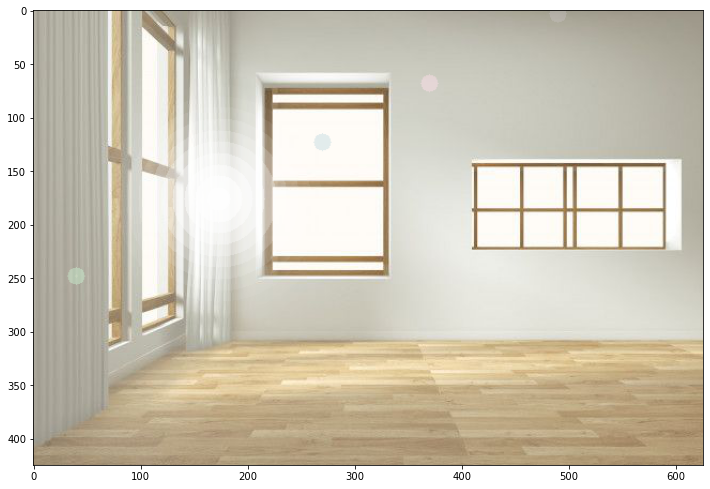

In [84]:
random_sun_flares = T.RandomAddSunFlares(p=1)
img_sun_flares = random_sun_flares(back_image)
plt.imshow(img_sun_flares, cmap='gray')

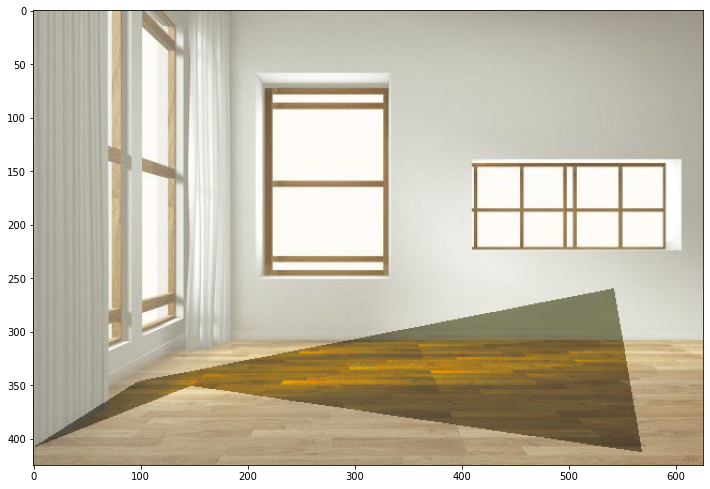

In [78]:
random_shadow = T.RandomAddShadow(p=1)
img_shadow = random_shadow(back_image)
plt.imshow(img_shadow, cmap='gray')

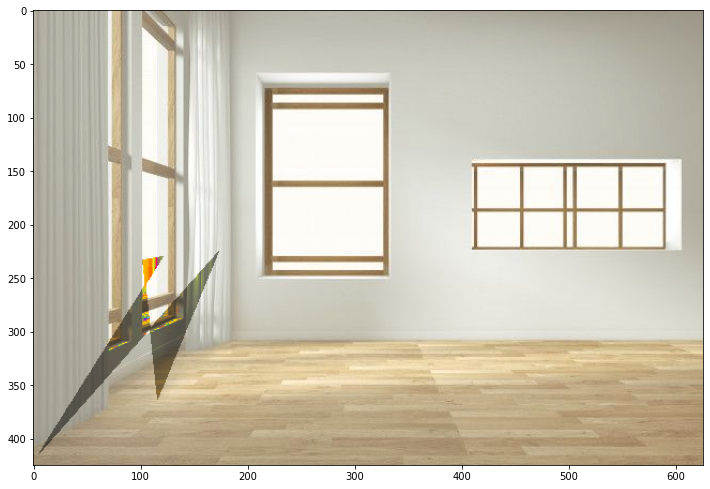

In [79]:
random_shadow = T.RandomAddShadow(p=1)
img_shadow = random_shadow(back_image)
plt.imshow(img_shadow, cmap='gray')

In [199]:
import random

alist = ['rand', 'bee', 'apple']
random.sample(alist, k=2)

['bee', 'apple']